In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import control.matlab as cm
import sympy as sy
.s

/home/kjartan/.virtualenvs/jupyter_notebook/src/ipython/IPython/kernel/__init__.py:10: UserWarning: The `IPython.kernel` package has been deprecated. You should import from ipython_kernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated. "


In [3]:
sS, omegaS = sy.symbols('s, omega')
GS = omegaS**2/(sS**2 + omegaS**2)
YS = GS/sS
print sy.apart(YS, sS)

-s/(omega**2 + s**2) + 1/s


In [ ]:

omega = 1.0

# h = np.pi/omega
h = 0.2/omega
A = np.array([[0, omega], [-omega, 0]])
B = np.array([[1],[0]])
C = np.array([[1, 0]])
D = np.array([[0]])
sys_c = cm.ss(A,B,C,D)

wh = omega*h
F = np.array([[np.cos(wh), np.sin(wh)], [-np.sin(wh), np.cos(wh)]])
G = 1.0/omega* np.array([[np.sin(wh)], [np.cos(wh)-1]])
sys_d = cm.ss(F,G,C,D, h)

Tc = np.linspace(0,8, 300)
(yc,tc) = cm.step(sys_c, Tc)
Td = h*np.arange(80)
(yd,td) = cm.step(sys_d, Td)
plt.plot(tc,yc)
plt.plot(td,yd[0], '*')
plt.xlim([0,8])

In [10]:
sys_d2 = cm.c2d(sys_c, h)
cm.ssdata([sys_d2,sys_d])


(array([[ 0.]]),
 array([[ 0.,  0.]]),
 array([[ 0.]]),
 matrix([[ A = [[ 0.82533561  0.56464247]
   [-0.56464247  0.82533561]]
 
  B = [[ 0.56464247]
   [-0.17466439]]
 
  C = [[1 0]]
 
  D = [[0]]
 
  dt = 0.6
  ,
          A = [[ 0.82533561  0.56464247]
   [-0.56464247  0.82533561]]
 
  B = [[ 0.56464247]
   [-0.17466439]]
 
  C = [[1 0]]
 
  D = [[0]]
 
  dt = 0.6
  ]], dtype=object))

In [3]:
F = np.array([[np.cos(omega*h), np.sin(omega*h)], [-np.sin(omega*h), np.cos(omega*h)]])
G = 1.0/omega* np.array([[np.sin(omega*h)], [np.cos(omega*h)-1]])
sys_d2 = cm.ss(F,G,C,D, h)


(0, 14)

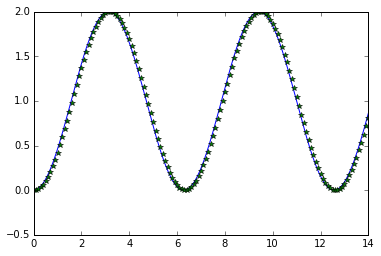

In [35]:
Tc = np.linspace(0,30, 1000)
uc = Tc # Unit ramp
Td = h*np.arange(400)
ud = Td

(yr, tc, xc) = cm.lsim(sys_c, uc, Tc)
(yrd, td, xd) = cm.lsim(sys_d, ud, Td)

plt.plot(tc,yr)
plt.plot(td,yrd[0], '*')
plt.xlim([0,14])



In [36]:
lmbda = np.linalg.eigvals(F)
p = np.linalg.eigvals(A)

lmbda - np.exp(p*h)

array([ 0. -1.38777878e-17j,  0. +1.38777878e-17j])

In [37]:
p

array([ 0.+1.j,  0.-1.j])

In [38]:
lmbda

array([ 0.99500417+0.09983342j,  0.99500417-0.09983342j])

In [39]:
import pdb
def mysim(F,G,C,D,u,x0):
    x = x0
    y = []
    for uk in u:
        yk = np.dot(C,x) + np.dot(D,uk)
        y.append(yk[0])
        x = np.dot(F,x) + np.dot(G, uk)
    
    return np.array(y)
        
u = np.ones(10)
x0 = np.zeros((2,1))
y = mysim(F,G,C,D,u,x0)
y-yd[0][:10]

array([[  0.00000000e+00,  -9.98334166e-02,  -1.98669331e-01,
         -2.95520207e-01,  -3.89418342e-01,  -4.79425539e-01,
         -5.64642473e-01,  -6.44217687e-01,  -7.17356091e-01,
         -7.83326910e-01],
       [  9.98334166e-02,   1.38777878e-17,  -9.88359141e-02,
         -1.95686790e-01,  -2.89584926e-01,  -3.79592122e-01,
         -4.64809057e-01,  -5.44384271e-01,  -6.17522674e-01,
         -6.83493493e-01],
       [  1.98669331e-01,   9.88359141e-02,   2.77555756e-17,
         -9.68508759e-02,  -1.90749012e-01,  -2.80756208e-01,
         -3.65973143e-01,  -4.45548356e-01,  -5.18686760e-01,
         -5.84657579e-01],
       [  2.95520207e-01,   1.95686790e-01,   9.68508759e-02,
          0.00000000e+00,  -9.38981356e-02,  -1.83905332e-01,
         -2.69122267e-01,  -3.48697481e-01,  -4.21835884e-01,
         -4.87806703e-01],
       [  3.89418342e-01,   2.89584926e-01,   1.90749012e-01,
          9.38981356e-02,   5.55111512e-17,  -9.00071963e-02,
         -1.75224131e-01

In [41]:
pdb.pm()

> /home/kjartan/.virtualenvs/jupyter_notebook/src/ipython/IPython/core/compilerop.py(100)ast_parse()
-> return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) q


In [42]:
np.dot(F,x0) + np.dot(D, u[0])

array([[ 0.],
       [ 0.]])

(0, 10)

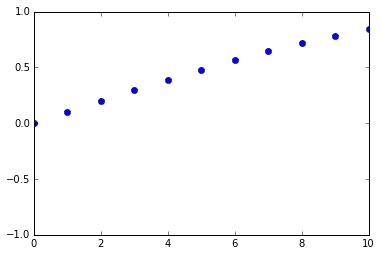

In [46]:
plt.plot(range(len(y)),y, 'r*')
plt.plot(range(len(yd[0])), yd[0], 'bo')
plt.xlim([0,10])

In [1]:
7.5/23.5

0.3191489361702128